# Investigate Hotel Business Using Data Viz

# Overview

Pada Mini Project ini, Saya berperan sebagai anggota dari tim Data Scientist di sebuah perusahaan hotel. Sebagai anggota dari tim Data Scientist, Saya mendapatkan tanggung jawab untuk memberikan insight-insight yang berhubungan dengan performa bisnis hotel. Insight tersebut dapat dicari dengan eksplorasi data, seperti menganalisis bagaimana perilaku para pelanggan dalam memesan tiket hotel ataupun mencari faktor-faktor yang mempengaruhi pembatalan pemesanan tiket hotel.

# Dataset

Dataset yang digunakan sebenarnya berasal dari link Kaggle [berikut](https://www.kaggle.com/datasets/mojtaba142/hotel-booking) yang telah dimodifikasi oleh tim Rakamin Academy untuk keperluan Mini Project ini, berikut adalah deskripsi datanya.
- `hotel` : The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel
- `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
- `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- `arrival_date_year` : Year of arrival date
- `arrival_date_month` : Month of arrival date with 12 categories: “January” to “December”
- `arrival_date_week_number` : Week number of the arrival date
- `arrival_date_day_of_month` : Day of the month of the arrival date
- `stays_in_weekend_nights` : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_weekdays_nights` : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
- `adults` : Number of adults
- `children` : Number of children
- `babies` : Number of babies
- `meal` : Meal menu
- `city` : City of origin
- `market_segment` : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `distribution_channel` : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
- `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
- `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- `deposit_type` : No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay
- `agent` : ID of the travel agency that made the booking
- `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
- `customer_type` : Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- `adr` : Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
- `required_car_parking_spaces` : Number of car parking spaces required by the customer
- `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
- `reservation_status` : Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

# Data Understanding

In [1]:
# load necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import calendar

# display setting
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [2]:
# load csv file into dataframe
df_hotel = pd.read_csv('hotel_bookings_data.csv')
# print first five rows
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Check Attributes and Datatypes

In [3]:
# view attributes and datatypes
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari hasil tersebut diketahui bahwa:
- Dataset yang digunakan terdiri dari 119390 baris dan 29 kolom (20 numerik dan 8 kategorik).
- Beberapa kolom terindikasi nilai null karena jumlah data non-null lebih kecil dari total baris datanya.
- Untuk penamaan kolom dan tipe data sudah sesuai.

## Check Missing Values

In [4]:
# view number of missing values
null_cols = df_hotel.columns[df_hotel.isnull().any()]
df_null = df_hotel[null_cols].isnull().sum().to_frame().reset_index()
df_null.columns = ['kolom', 'jumlah']
df_null['persentase'] = round(df_null['jumlah']/len(df_hotel) * 100, 3)
df_null

,kolom,jumlah,persentase
0,children,4,0.003
1,city,488,0.409
2,agent,16340,13.686
3,company,112593,94.307


Dari hasil tersebut dapat disimpulkan bahwa:
- Nilai null pada kolom `children`, `city`, dan `agent` akan diisi dengan metode imputasi.
- Kolom `company` dapat dihapus saja karena sekitar 94% baris datanya adalah nilai null.

## Check Duplicate Data

In [5]:
print(f'Apakah terdapat data yang duplikat? {df_hotel.duplicated().any()}')
print(f'Jumlah data yang duplikat sebanyak {df_hotel.duplicated().sum()} baris')

Apakah terdapat data yang duplikat? True
Jumlah data yang duplikat sebanyak 33261 baris


## Check Distribution Data

In [6]:
# split columns into numerical dan categorical
num_cols = df_hotel.select_dtypes(exclude='object').columns.tolist()
cat_cols = df_hotel.select_dtypes(include='object').columns.tolist()

# view number of columns
print(f'Jumlah kolom numerik adalah {len(num_cols)}')
print(f'Jumlah kolom kategorik adalah {len(cat_cols)}')

Jumlah kolom numerik adalah 20
Jumlah kolom kategorik adalah 9


In [7]:
# statistics of numerical columns
df_hotel[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
# statistics of categorical columns
df_hotel[cat_cols].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


Dari hasil statistik tersebut dapat disimpulkan bahwa:
- Terdapat beberapa kolom yang mengindikasikan adanya nilai null (count data < total) seperti `children`, `agent`, `company`, dan `city`
- Terdapat beberapa kolom yang memiliki distribusi skewed (mean dan median berbeda cukup jauh) seperti `lead_time`, `agent`, `days_in_waiting_list`, dan `adr`
- Kolom `adr` terdapat data yang bernilai negatif
- Untuk kolom numerik lainnya bisa diabaikan karena berjenis data interval dan diskrit.
- Hampir semua kolom kategorik memiliki jumlah nilai unik yang tidak terlalu banyak, kecuali kolom `city`
- Hampir semua top kategori dari setiap kolom memiliki proporsi diatas 50%.

## Check Inconsistent Data

In [9]:
for col in cat_cols:
    print(f'Jumlah nilai unik dari kolom {col} ada {df_hotel[col].nunique()}:')
    print(df_hotel[col].unique().tolist())
    print('\n')

Jumlah nilai unik dari kolom hotel ada 2:
['Resort Hotel', 'City Hotel']


Jumlah nilai unik dari kolom arrival_date_month ada 12:
['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']


Jumlah nilai unik dari kolom meal ada 5:
['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined']


Jumlah nilai unik dari kolom city ada 177:
['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman', 'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan, 'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang', 'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung', 'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur', 'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu', 'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan', 'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo', 'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu', 'Kabupaten Bandung Barat', 'Kabupaten Bekasi', 'Kabupaten Bogor', 'Kabupaten Cia

Dari hasil diatas dapat diketahui bahwa hampir semua kolom kategorik memiliki penamaan yang sesuai pada nilai unik nya, kecuali kolom `meal` dimana **"Undefined"** seharusnya memiliki makna yang sama dengan **"No Meal"**

## EDA Conclusion

- Penamaan kolom dan tipe data sudah sesuai
- Terdapat 4 kolom yang memiliki nilai null, yaitu `children`, `city`, `agent`, dan `company`
- Terdapat 33261 baris yang redudan
- Terdapat beberapa kolom yang memiliki distribusi skewed, yaitu `lead_time`, `agent`, `days_in_waiting_list`, dan `adr`
- Terdapat kolom yang memiliki data tidak konsisten, yaitu `meal` dan `adr`

# Data Preprocessing

In [10]:
# copy dataframe
df_hotel_prep = df_hotel.copy()

## Handling Missing Values

- Nilai null pada kolom `children` akan diisi dengan nilai 0 (dianggap tidak memiliki anak)
- Nilai null pada kolom `city` akan diisi dengan "Undefined" (terlalu banyak nilai unik)
- Nilai null pada kolom `agent` akan diisi dengan nilai median (berdistribusi skewed)
- Kolom `company` akan dihapus (nilai null mencapai 94%)

In [11]:
# handling missing values
df_hotel_prep['children'].fillna(0, inplace=True)
df_hotel_prep['city'].fillna('Undefined', inplace=True)
df_hotel_prep['agent'].fillna(df_hotel_prep['agent'].median(), inplace=True)
df_hotel_prep.drop('company', axis=1, inplace=True)

print(f'Apakah masih terdapat nilai null? {df_hotel_prep.isnull().any().any()}')

Apakah masih terdapat nilai null? False


## Handling Duplicate Data

Melakukan penghapusan data pada baris yang duplikat

In [12]:
# remove duplicate rows
print(f'Jumlah data sebelum difilter duplikat data adalah {len(df_hotel_prep)} baris')
df_hotel_prep.drop_duplicates(inplace=True)
print(f'Jumlah baris setelah difilter duplikat data adalah {len(df_hotel_prep)} baris')

Jumlah data sebelum difilter duplikat data adalah 119390 baris
Jumlah baris setelah difilter duplikat data adalah 86118 baris


## Handling Inconsistent Data

- Melakukan filter dataframe dimana nilai kolom `adr` tidak boleh negatif
- Melakukan penggantian data pada kolom `meal` dimana "Undefined" akan diganti "No Meal"

In [13]:
# handling and filtering inconsistent data
df_hotel_prep = df_hotel_prep[df_hotel_prep['adr'] >= 0]
df_hotel_prep['meal'].replace('Undefined', 'No Meal', inplace=True)
print(df_hotel_prep.shape)

(86117, 28)


In [14]:
# save clean hotel bookings data
df_hotel_cleaned = df_hotel_prep.copy()
df_hotel_cleaned.to_csv('hotel_bookings_cleaned.csv', index=False)

# Data Visualization

## 1. Monthly Hotel Bookings Analysis

In [15]:
# grouping hotel bookings by arrival date
hotel_by_arrival_date = df_hotel_cleaned.groupby(['arrival_date_day_of_month',
                                                  'arrival_date_month', 
                                                  'arrival_date_year',
                                                  'hotel'])['hotel'].count().reset_index(name='total')
hotel_by_arrival_date.head()

,arrival_date_day_of_month,arrival_date_month,arrival_date_year,hotel,total
0,1,April,2018,City Hotel,29
1,1,April,2018,Resort Hotel,30
2,1,April,2019,City Hotel,45
3,1,April,2019,Resort Hotel,30
4,1,August,2018,City Hotel,59


In [16]:
# create new column as date
date_cols = hotel_by_arrival_date['arrival_date_day_of_month'].astype(str) + ' ' + \
            hotel_by_arrival_date['arrival_date_month'] + ' ' + \
            hotel_by_arrival_date['arrival_date_year'].astype(str)

# create new column as datetime object
hotel_by_arrival_date['arrival_date'] = pd.to_datetime(date_cols, errors='coerce')

# check if any wrong format date
hotel_by_arrival_date[hotel_by_arrival_date['arrival_date'].isnull()]

,arrival_date_day_of_month,arrival_date_month,arrival_date_year,hotel,total,arrival_date
1466,29,February,2017,City Hotel,79,NaT
1467,29,February,2017,Resort Hotel,26,NaT
1468,29,February,2018,City Hotel,94,NaT
1469,29,February,2018,Resort Hotel,33,NaT
1514,30,February,2017,City Hotel,74,NaT
1515,30,February,2017,Resort Hotel,56,NaT
1516,30,February,2018,City Hotel,93,NaT
1517,30,February,2018,Resort Hotel,98,NaT
1558,31,February,2017,City Hotel,60,NaT
1559,31,February,2017,Resort Hotel,42,NaT


Dari hasil diatas diketahui bahwa terdapat data kedatangan pelanggan yang tidak sesuai dengan format tanggal di kalendar sehingga perlu dilakukan parsing manual.

In [17]:
# fix wrong format date
def parse_date(dt):
    d, m, y = dt.split(' ')
    m = datetime.strptime(m, '%B').month
    
    # check day
    last = calendar.monthrange(int(y), m)[-1]
    if int(d) > last:
        m += 1
        d = str(int(d) - last)
        
    new_date = '-'.join([y, str(m), d])
    
    return datetime.strptime(new_date, '%Y-%m-%d')

# do date normalization
hotel_by_arrival_date['arrival_date'] = date_cols.apply(lambda x : parse_date(x))
hotel_by_arrival_date['arrival_date_day_of_month'] = hotel_by_arrival_date['arrival_date'].apply(lambda x : x.strftime('%d'))
hotel_by_arrival_date['arrival_date_month'] = hotel_by_arrival_date['arrival_date'].apply(lambda x : x.strftime('%B'))

# regroup hotel bookings by month every year
hotel_by_month = hotel_by_arrival_date.groupby([pd.Grouper(key='arrival_date', freq='M'), 'hotel'])['total'].sum().unstack()
hotel_by_month

hotel,City Hotel,Resort Hotel
arrival_date,,
2017-01-31,763,845
2017-02-28,790,825
2017-03-31,213,124
2017-09-30,367,1219
2017-10-31,1068,1400
2017-11-30,1544,1135
2017-12-31,1457,1111
2018-01-31,2132,1180
2018-02-28,1751,987


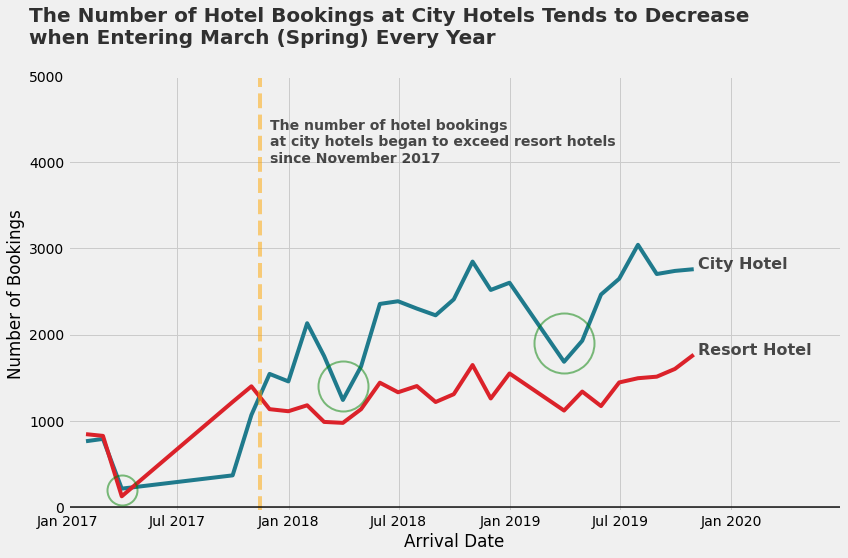

In [18]:
# create multi line chart
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.lineplot(x=hotel_by_month.index, y=hotel_by_month['City Hotel'], color='#1F7A8C')
sns.lineplot(x=hotel_by_month.index, y=hotel_by_month['Resort Hotel'], color='#DB222A')

# setting axis labels
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xlim(datetime(2017, 1, 1), datetime(2020, 6, 30))
plt.ylim(-50, 5000)

# add annotation text and shape
plt.axvline(datetime(2017, 11, 14), linestyle='--', color='orange', alpha=.5)
plt.axhline(y=0, color ='black', linewidth=2, alpha=.7)
ax.plot(datetime(2017, 3, 31), 200, 'o',
        ms=30, mec='g', mfc='none', mew=2, alpha=.5)
ax.plot(datetime(2018, 3, 31), 1400, 'o',
        ms=50, mec='g', mfc='none', mew=2, alpha=.5)
ax.plot(datetime(2019, 3, 31), 1900, 'o',
        ms=60, mec='g', mfc='none', mew=2, alpha=.5)
plt.text(x=datetime(2017, 11, 30), y=4000, s='The number of hotel bookings\nat city hotels began to exceed resort hotels\nsince November 2017',
         fontweight='bold', fontsize=14, alpha=.7)

# setting legend and title
plt.text(x=hotel_by_month.index[-1]+timedelta(7), y=hotel_by_month['City Hotel'][-1], s='City Hotel',
         fontweight='bold', fontsize=16, alpha=.7)
plt.text(x=hotel_by_month.index[-1]+timedelta(7), y=hotel_by_month['Resort Hotel'][-1], s='Resort Hotel',
         fontweight='bold', fontsize=16, alpha=.7)
ax.set_title('The Number of Hotel Bookings at City Hotels Tends to Decrease\nwhen Entering March (Spring) Every Year',
             x=-0.05, y=1.06, loc='left', fontweight='bold', fontsize=20, alpha=.8)

plt.tight_layout()
plt.savefig('fig/monthly_bookings.png')
plt.show()

## 2. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate

In [19]:
# show distribution of total stay duration
df_hotel_cleaned['total_duration'] = df_hotel_cleaned['stays_in_weekdays_nights'] + df_hotel_cleaned['stays_in_weekend_nights']
df_hotel_cleaned['total_duration'].describe(percentiles = [.25, .5, .75, .9, .95, .99])

count    86117.000000
mean         3.643241
std          2.770186
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
90%          7.000000
95%          8.000000
99%         14.000000
max         69.000000
Name: total_duration, dtype: float64

Dari hasil diatas dapat disimpulkan bahwa total durasi menginap memiliki distribusi skew sehingga akan dikelompokkan dengan proporsi 50:40:10, dimana:
- Kelompok "Short" -> memiliki total durasi menginap dibawah persentile 50%
- Kelompok "Standard" -> memiliki total durasi menginap antara persentile 50% sampai dengan persentile 90%
- Kelompok "Long" -> memiliki total durasi menginap diatas persentile 90%

In [20]:
# define total stay duration at percentile 50% and 90%
stay_p50 = df_hotel_cleaned['total_duration'].quantile(.5)
stay_p90 = df_hotel_cleaned['total_duration'].quantile(.9)

# create function to get stay duration type
def get_stay_duration_type(x):
    if x < stay_p50:
        return 'Short'
    elif x <= stay_p90:
        return 'Standard'
    else:
        return 'Long'
    
df_hotel_cleaned['stay_duration_type'] = df_hotel_cleaned['total_duration'].apply(lambda x : get_stay_duration_type(x))

# retrieve cancellation rate by hotel type and stay duration type
hotel_cancellation_by_duration = df_hotel_cleaned.groupby(['hotel', 'stay_duration_type', 'is_canceled'])['hotel'].count()
hotel_cancellation_by_duration = hotel_cancellation_by_duration.unstack().apply(lambda x : x/x.sum() * 100, axis=1)
hotel_cancellation_by_duration.columns = ['processed', 'canceled']
hotel_cancellation_by_duration = hotel_cancellation_by_duration.reindex(['Short', 'Standard', 'Long'], level=1)
hotel_cancellation_by_duration

processed   canceled
hotel        stay_duration_type                      
City Hotel   Short               74.131090  25.868910
             Standard            67.819524  32.180476
             Long                46.147333  53.852667
Resort Hotel Short               84.478011  15.521989
             Standard            72.008941  27.991059
             Long                72.394981  27.605019

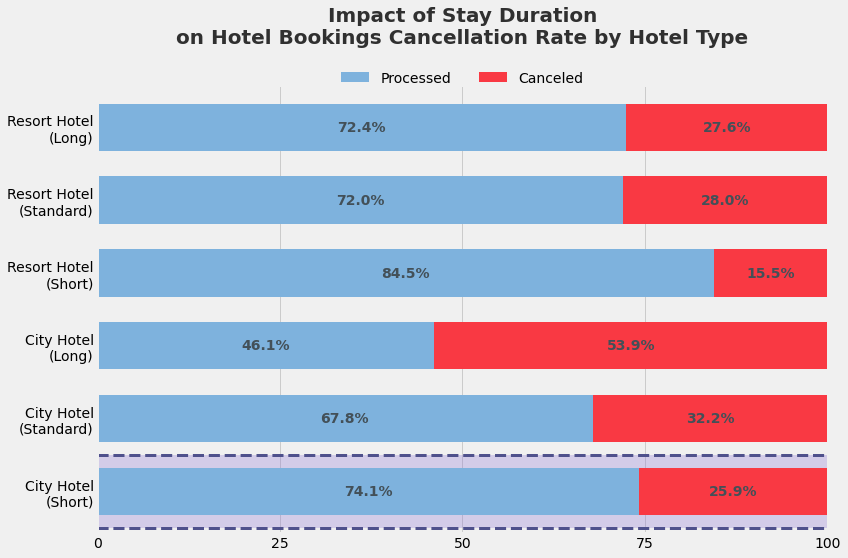

In [21]:
# create 100% stacked bar chart
fig_stay_duration = hotel_cancellation_by_duration.plot(kind='barh', figsize=(12,8), stacked=True,
                                                        width=0.65, color=['#7EB2DD', '#F93943'])

# setting axis label
fig_stay_duration.set_ylabel('')
fig_stay_duration.set_xlim(0, 100)
plt.tick_params(axis='both', which='major', labelsize=14)
fig_stay_duration.get_xaxis().set_ticks([0, 25, 50, 75, 100])
stay_duration_ticks = [y.get_text().replace('(', '').replace(', ', '\n(') for y in fig_stay_duration.get_yticklabels()]
fig_stay_duration.set_yticklabels(stay_duration_ticks)

# add annotation labels
cancel_rate_by_duration = hotel_cancellation_by_duration['processed'].tolist() + hotel_cancellation_by_duration['canceled'].tolist()
for rec, data in zip(fig_stay_duration.patches, cancel_rate_by_duration):
    fig_stay_duration.text(rec.get_x() + rec.get_width() / 2,
                           rec.get_y() + rec.get_height() / 2,
                           '{:.1f}%'.format(data), color='#435058',
                           fontweight='bold', fontsize=14,
                           ha='center', va='center')

# add stackplot and horizontal line
plt.stackplot(np.arange(0, 101, 1), [np.arange(0.5, 1.5, 1)], colors='#907AD6', alpha=0.3)
plt.stackplot(np.arange(0, 101, 1), [np.arange(-0.5, 0.5, 1)], colors='#907AD6', alpha=0.3)
plt.axhline(y=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axhline(y=0.5, color='#4F518C', linestyle='--', linewidth=3) 

# setting legend and title
legend_labels, _= fig_stay_duration.get_legend_handles_labels()
fig_stay_duration.legend(legend_labels, ['Processed', 'Canceled'], loc='upper center', ncol=2,
                         bbox_to_anchor=(.5, 1.06), frameon=False, fontsize=14)
fig_stay_duration.set_title('Impact of Stay Duration\non Hotel Bookings Cancellation Rate by Hotel Type',
                            x=0.5, y=1.08, loc='center', fontweight='bold', fontsize=20, alpha=.8)

plt.tight_layout()
plt.savefig('fig/cancellation_rate_by_stay_duration.png')
plt.show()

In [22]:
# grouping total stay duration by hotel type and stay duration type
df_hotel_cleaned.groupby(['hotel', 'stay_duration_type'], as_index=False).agg({'total_duration': ['min', 'max']})

hotel stay_duration_type total_duration    
                                              min max
0    City Hotel               Long              8  57
1    City Hotel              Short              0   2
2    City Hotel           Standard              3   7
3  Resort Hotel               Long              8  69
4  Resort Hotel              Short              0   2
5  Resort Hotel           Standard              3   7

## 3. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [23]:
# show distribution of lead time
df_hotel_cleaned['lead_time'].describe(percentiles = [.1, .2, .25, .5, .75, .9])

count    86117.000000
mean        79.254282
std         85.499731
min          0.000000
10%          1.000000
20%          7.000000
25%         11.000000
50%         49.000000
75%        124.000000
90%        203.000000
max        737.000000
Name: lead_time, dtype: float64

Dari hasil diatas dapat disimpulkan bahwa lama hari sampai tanggal booking memiliki distribusi skew sehingga akan dikelompokkan dengan proporsi 20:30:50, dimana:
- Kelompok "Fast" -> memiliki lama hari sampai tanggal booking dibawah persentile 20%
- Kelompok "Medium" -> memiliki lama hari sampai tanggal booking antara persentile 20% sampai dengan persentile 50%
- Kelompok "Slow" -> memiliki lama hari sampai tanggal booking diatas persentile 50%

In [24]:
# define lead time at percentile 20% and 50%
lead_p20 = df_hotel_cleaned['lead_time'].quantile(.2)
lead_p50 = df_hotel_cleaned['lead_time'].quantile(.5)

# create function to get lead time type
def get_lead_time_type(x):
    if x < lead_p20:
        return 'Fast'
    elif x <= lead_p50:
        return 'Medium'
    else:
        return 'Slow'
    
df_hotel_cleaned['lead_time_type'] = df_hotel_cleaned['lead_time'].apply(lambda x : get_lead_time_type(x))

# retrieve cancellation rate by hotel type and lead time type
hotel_cancellation_by_lead = df_hotel_cleaned.groupby(['hotel', 'lead_time_type', 'is_canceled'])['hotel'].count()
hotel_cancellation_by_lead = hotel_cancellation_by_lead.unstack().apply(lambda x : x/x.sum() * 100, axis=1)
hotel_cancellation_by_lead.columns = ['processed', 'canceled']
hotel_cancellation_by_lead = hotel_cancellation_by_lead.reindex(['Slow', 'Medium', 'Fast'], level=1)
hotel_cancellation_by_lead

processed   canceled
hotel        lead_time_type                      
City Hotel   Slow            62.124773  37.875227
             Medium          71.075300  28.924700
             Fast            89.861903  10.138097
Resort Hotel Slow            67.381974  32.618026
             Medium          77.549061  22.450939
             Fast            94.196997   5.803003

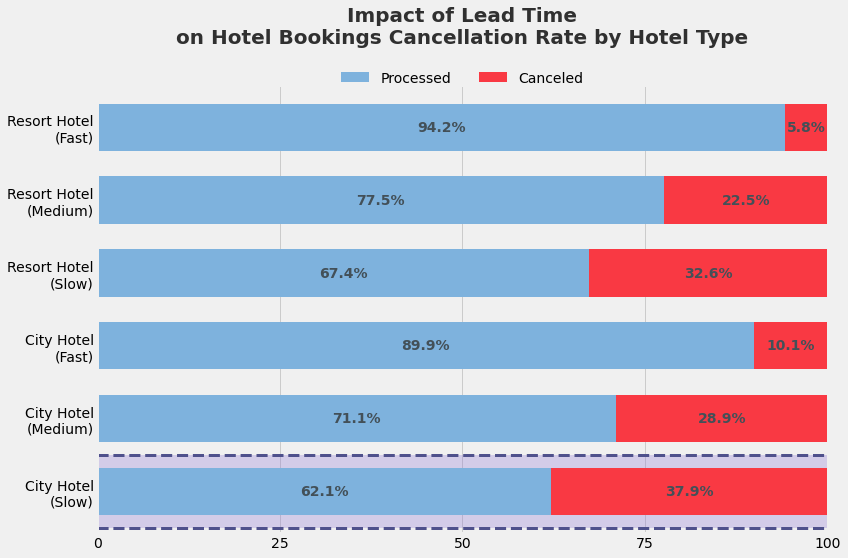

In [25]:
# create 100% stacked bar chart
fig_lead_time = hotel_cancellation_by_lead.plot(kind='barh', figsize=(12,8), stacked=True,
                                                width=0.65, color=['#7EB2DD', '#F93943'])

# setting axis label
fig_lead_time.set_ylabel('')
fig_lead_time.set_xlim(0, 100)
plt.tick_params(axis='both', which='major', labelsize=14)
fig_lead_time.get_xaxis().set_ticks([0, 25, 50, 75, 100])
fig_lead_time.set_yticklabels([y.get_text().replace('(', '').replace(', ', '\n(') for y in fig_lead_time.get_yticklabels()])

# add annotation labels
cancel_rate_by_lead = hotel_cancellation_by_lead['processed'].tolist() + hotel_cancellation_by_lead['canceled'].tolist()
for rec, data in zip(fig_lead_time.patches, cancel_rate_by_lead):
    fig_lead_time.text(rec.get_x() + rec.get_width() / 2,
                       rec.get_y() + rec.get_height() / 2,
                       '{:.1f}%'.format(data), color='#435058',
                       fontweight='bold', fontsize=14,
                       ha='center', va='center')
    
# add stackplot and horizontal line
plt.stackplot(np.arange(0, 101, 1), [np.arange(0.5, 1.5, 1)], colors='#907AD6', alpha=0.3)
plt.stackplot(np.arange(0, 101, 1), [np.arange(-0.5, 0.5, 1)], colors='#907AD6', alpha=0.3)
plt.axhline(y=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axhline(y=0.5, color='#4F518C', linestyle='--', linewidth=3) 

# setting legend and title
legend_labels, _= fig_lead_time.get_legend_handles_labels()
fig_lead_time.legend(legend_labels, ['Processed', 'Canceled'], loc='upper center', ncol=2,
                     bbox_to_anchor=(.5, 1.06), frameon=False, fontsize=14)
fig_lead_time.set_title('Impact of Lead Time\non Hotel Bookings Cancellation Rate by Hotel Type',
                        x=0.5, y=1.08, loc='center', fontweight='bold', fontsize=20, alpha=.8)

plt.tight_layout()
plt.savefig('fig/cancellation_rate_by_lead_time.png')
plt.show()

In [26]:
# grouping lead time by hotel type and lead time type
df_hotel_cleaned.groupby(['hotel', 'lead_time_type'], as_index=False).agg({'lead_time': ['min', 'max']})

hotel lead_time_type lead_time     
                                     min  max
0    City Hotel           Fast         0    6
1    City Hotel         Medium         7   49
2    City Hotel           Slow        50  629
3  Resort Hotel           Fast         0    6
4  Resort Hotel         Medium         7   49
5  Resort Hotel           Slow        50  737